In [ ]:
# #dataremoval
# #this code helps to identify the longest duration of the audio.
# import os
# import wave
# import contextlib

# DATASET_PATH = r"C:\Users\naray\Python_for_aisp\Data"
# JSON_PATH = "lang_features.json"
# SAMPLE_RATE = 22050
# TRACK_DURATION = 7 # measured in seconds
# SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
# maxe=0
# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):
#     if dirpath is not DATASET_PATH:
#         for f in filenames:
#             # load audio file
#             file_path = os.path.join(dirpath, f)
#             with contextlib.closing(wave.open(file_path,'r')) as f:
#                 frames = f.getnframes()
#                 rate = f.getframerate()
#                 duration = frames / float(rate)
#                 if duration > 10:
#                     f.close()
#                     os.remove(file_path)
#                 elif maxe < duration:
#                     maxe=duration
#                     x=file_path
# print(maxe)
# print(x)

In [ ]:
# #This code appends the extra silent seconds to each audio file to extract mfccs evenly for each audio
# import os
# import wave
# import contextlib
# from pydub import AudioSegment
# from pydub.playback import play

# DATASET_PATH = r"C:\Users\naray\Python_for_aisp\Data"
# JSON_PATH = "lang_features.json"
# SAMPLE_RATE = 22050
# TRACK_DURATION = 10 # measured in seconds
# SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
# maxe=0
# for i, (dirpath, dirnames, filenames) in enumerate(os.walk(DATASET_PATH)):
#     if dirpath is not DATASET_PATH:
#         for f in filenames:
#             # load audio file
#             file_path = os.path.join(dirpath, f)
#             with contextlib.closing(wave.open(file_path,'r')) as f:
#                 frames = f.getnframes()
#                 rate = f.getframerate()
#                 dur = frames / float(rate)
#                 sec_segment = AudioSegment.silent(duration=(10000-dur*1000))
#                 song = AudioSegment.from_wav(file_path)
#                 final_song = song + sec_segment
#                 final_song.export(file_path, format="wav")


In [ ]:
# #
# import json
# import os
# import math
# import librosa

# DATASET_PATH = r"C:\Users\naray\Python_for_aisp\Data"
# JSON_PATH = "lang_features.json"
# SAMPLE_RATE = 22050
# TRACK_DURATION = 7 # measured in seconds
# SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


# def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=2):
#     """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

#         :param dataset_path (str): Path to dataset
#         :param json_path (str): Path to json file used to save MFCCs
#         :param num_mfcc (int): Number of coefficients to extract
#         :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
#         :param hop_length (int): Sliding window for FFT. Measured in # of samples
#         :param: num_segments (int): Number of segments we want to divide sample tracks into
#         :return:
#         """

#     # dictionary to store mapping, labels, and MFCCs
#     data = {
#         "mapping": [],
#         "labels": [],
#         "mfcc": []
#     }
#     samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
#     num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

#     # loop through all genre sub-folder
#     for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

#         # ensure we're processing a genre sub-folder level
#         if dirpath is not dataset_path:

#             # save genre label (i.e., sub-folder name) in the mapping
#             semantic_label = dirpath.split("/")[-1]
#             data["mapping"].append(semantic_label)
#             print("\nProcessing: {}".format(semantic_label))

#             # process all audio files in genre sub-dir
#             for f in filenames:

# 		# load audio file
#                 file_path = os.path.join(dirpath, f)
#                 signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

#                 # process all segments of audio file
#                 for d in range(num_segments):

#                     # calculate start and finish sample for current segment
#                     start = samples_per_segment * d
#                     finish = start + samples_per_segment

#                     # extract mfcc
#                     mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
#                     mfcc = mfcc.T

#                     # store only mfcc feature with expected number of vectors
#                     if len(mfcc) == num_mfcc_vectors_per_segment:
#                         data["mfcc"].append(mfcc.tolist())
#                         data["labels"].append(i-1)
#                         print("{}, segment:{}".format(file_path, d+1))

#     # save MFCCs to json file
#     with open(json_path, "w") as fp:
#         json.dump(data, fp, indent=4)
        
# if __name__ == "__main__":
#     save_mfcc(DATASET_PATH, JSON_PATH, num_segments=2)

Training started
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 149, 11, 32)       320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 75, 6, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 75, 6, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 73, 4, 32)         9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 37, 2, 32)        0         
 g2D)                                                            
                                    

Epoch 21/30
317/317 [==============================] - ETA: 0s - loss: 0.2835 - accuracy: 0.8702
Epoch 21: saving model to best_model_lang_detect_cnn.h5
317/317 [==============================] - 14s 43ms/step - loss: 0.2835 - accuracy: 0.8702 - val_loss: 0.3627 - val_accuracy: 0.8229
Epoch 22/30
317/317 [==============================] - ETA: 0s - loss: 0.2720 - accuracy: 0.8750
Epoch 22: saving model to best_model_lang_detect_cnn.h5
317/317 [==============================] - 13s 42ms/step - loss: 0.2720 - accuracy: 0.8750 - val_loss: 0.3521 - val_accuracy: 0.8166
Epoch 23/30
317/317 [==============================] - ETA: 0s - loss: 0.2729 - accuracy: 0.8734
Epoch 23: saving model to best_model_lang_detect_cnn.h5
317/317 [==============================] - 13s 42ms/step - loss: 0.2729 - accuracy: 0.8734 - val_loss: 0.3392 - val_accuracy: 0.8398
Epoch 24/30
317/317 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.8721
Epoch 24: saving model to best_model_lang_det

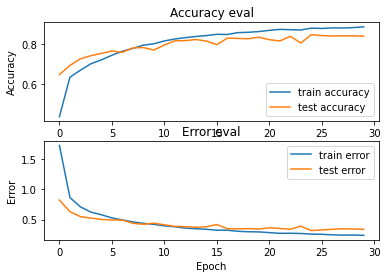

132/132 - 2s - loss: 0.3094 - accuracy: 0.8655 - 2s/epoch - 12ms/step

Test accuracy: 0.8655303120613098
1/1 [==============================] - 0s 196ms/step
Target: 1, Predicted label: [1]


In [80]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "lang_features.json"

def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model_cnn(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

def build_model_lstm(input_shape):
    """Generates lstm model
    :param input_shape (tuple): Shape of input set
    :return model: lstm model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    model.add(keras.layers.Dense(2, activation='softmax'))

    return model

def build_model_gru(input_shape):
    """Generates gru model
    :param input_shape (tuple): Shape of input set
    :return model: gru model
    """

    # build network topology
    model = keras.Sequential()

    model.add(keras.layers.GRU(128, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.GRU(64))

          # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

          # output layer
    model.add(keras.layers.Dense(2, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    print('Training started')
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    input_shape_1=(X_train.shape[1], X_train.shape[2])
    #to create lstm
    model = build_model_cnn(input_shape)
#     #to create gru model
#     model = build_model_gru(input_shape_1)
#     #to create cnn model
#     model = build_model_cnn(input_shape_1)

#claaback to create function to save model weights for every epoch
    callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model_lang_detect_cnn.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30,callbacks=[callback])

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[1000]
    y_to_predict = y_test[1000]

    # predict sample
    predict(model, X_to_predict, y_to_predict)



In [87]:
#model lstm accuracy, precission, recall, f1-score and precision values
model_gru = build_model_gru(input_shape_1)
model_gru.summary()
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_gru.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_gru.load_weights('best_model_lang_detect_gru.h5')
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model_gru.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(y_test,y_pred),'\n')

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_27 (GRU)                (None, 151, 128)          54912     
                                                                 
 gru_28 (GRU)                (None, 64)                37248     
                                                                 
 dense_58 (Dense)            (None, 64)                4160      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 2)                 130       
                                                                 
Total params: 96,450
Trainable params: 96,450
Non-trainable params: 0
_________________________________________________________________
132/132 [==============================] - 9s 59m

In [88]:
#model cnn accuracy, precission, recall, f1-score and precision values
model_cnn = build_model_cnn(input_shape)
model_cnn.summary()
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_cnn.load_weights('best_model_lang_detect_cnn.h5')
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model_cnn.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(y_test,y_pred),'\n')

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 149, 11, 32)       320       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 75, 6, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 75, 6, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 73, 4, 32)         9248      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 37, 2, 32)        0         
 g2D)                                                            
                                                     

In [89]:
#model lstm accuracy, precission, recall, f1-score and precision values
model_lstm = build_model_lstm(input_shape_1)
model_lstm.summary()
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model_lstm.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_lstm.load_weights('best_model_lang_detect_lstm.h5')
from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model_lstm.predict(X_test)
y_pred = np.array([np.argmax(pred) for pred in Y_pred])
print('  Classification Report:\n',classification_report(y_test,y_pred),'\n')

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 151, 128)          72704     
                                                                 
 lstm_17 (LSTM)              (None, 64)                49408     
                                                                 
 dense_62 (Dense)            (None, 64)                4160      
                                                                 
 dropout_31 (Dropout)        (None, 64)                0         
                                                                 
 dense_63 (Dense)            (None, 2)                 130       
                                                                 
Total params: 126,402
Trainable params: 126,402
Non-trainable params: 0
_________________________________________________________________
132/132 [==============================] - 12s 

In [50]:
import json
import os
import math
import librosa
file_path = r'C:\Users\naray\Python_for_aisp\Data\Telugu\tef_01033_00010179612.wav'
signal, sample_rate = librosa.load(file_path, sr=22050)
SAMPLES_PER_TRACK=22050*5
for d in range(1):
    samples_per_segment=int(SAMPLES_PER_TRACK / 2)
    start = samples_per_segment * d
    finish = int(SAMPLES_PER_TRACK / 2)

    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)
    mfcc = mfcc.T
print(mfcc.shape)

C:\Users\naray\AppData\Local\Temp\ipykernel_21460\2274897515.py:14: FutureWarning: Pass y=[-0.00010947 -0.0001653  -0.00014516 ...  0.          0.
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=13, n_fft=2048, hop_length=512)


(151, 13)


In [57]:
for i in range(0,100,2):
    X_to_predict = X_test[i]
    y_to_predict = y_test[i]

    # predict sample
    predict(model, X_to_predict, y_to_predict)
    

1/1 [==============================] - 2s 2s/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 43ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 43ms/step
Target: 0, Predicted label: [0]
1/1 [==============================] - 0s 43ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 45ms/step
Target: 1, Predicted label: [0]
1/1 [==============================] - 0s 52ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 45ms/step
Target: 0, Predicted label: [0]
1/1 [==============================] - 0s 43ms/step
Target: 0, Predicted label: [0]
1/1 [==============================] - 0s 44ms/step
Target: 0, Predicted label: [0]
1/1 [==============================] - 0s 42ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 45ms/step
Target: 1, Predicted label: [1]
1/1 [==============================] - 0s 43ms/step
Target: 1, Predicted label

In [58]:
y=mfcc.reshape(151,13,1)
X = y[np.newaxis, ...]
label=
prediction=model.predict(X)
predicted_index = np.argmax(prediction, axis=1)
print('predicted index :',predicted_index)

1/1 [==============================] - 0s 45ms/step
predicted index : [1]


In [6]:
import json
import os
import math
import librosa

DATASET_PATH = r"C:\Users\sreed\Downloads\Data"
JSON_PATH = "lang_features_zero_crossing_rate.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 7 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=2):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):    
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.zero_crossing_rate(signal[start:finish], sample_rate,hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=2)


Processing: C:\Users\sreed\Downloads\Data\Mixed
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00001.wav, segment:1


C:\Users\sreed\AppData\Local\Temp/ipykernel_4372/3206162734.py:59: FutureWarning: Pass frame_length=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.zero_crossing_rate(signal[start:finish], sample_rate,hop_length=hop_length)


C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00001.wav, segment:2
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00002.wav, segment:1
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00002.wav, segment:2
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00003.wav, segment:1
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00003.wav, segment:2
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00004.wav, segment:1
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00004.wav, segment:2
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00005.wav, segment:1
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00005.wav, segment:2
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00006.wav, segment:1
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00006.wav, segment:2
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00007.wav, segment:1
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00007.wav, segment:2
C:\Users\sreed\Downloads\Data\Mixed\f0001_us_f0001_00008.wav, se